In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (12, 6)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

# from https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib?rq=1
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


In [2]:
train_df = pd.read_csv("data/train.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**There are a lot of locations missings**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
# Analysing null values
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
# Lets see the number of (rows, cols)
print(train_df.shape)

(7613, 5)


In [7]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

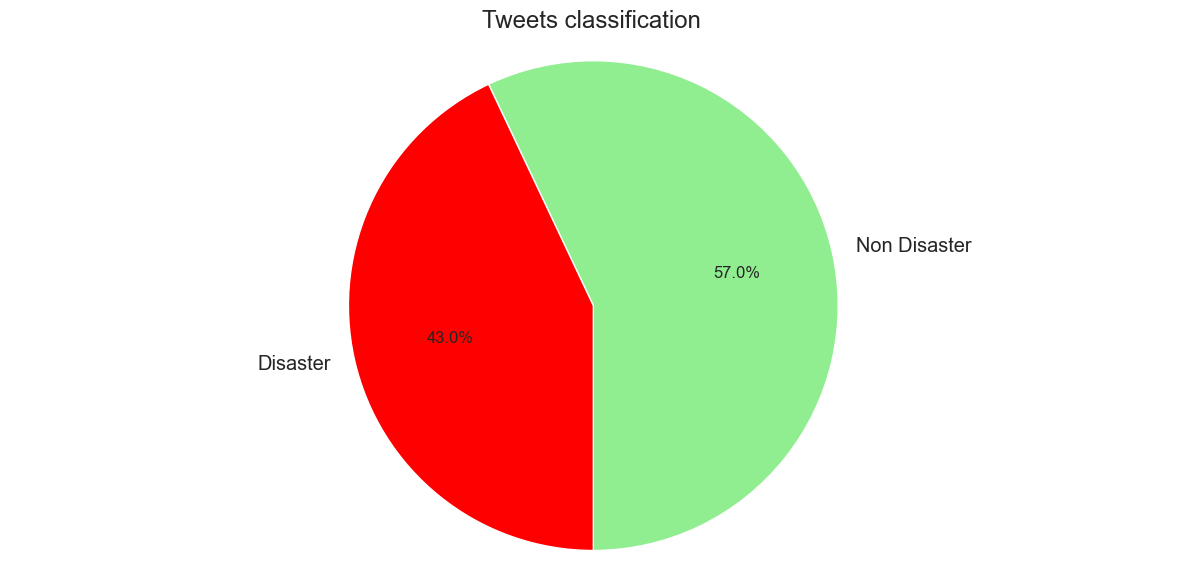

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Non Disaster', 'Disaster'

fig1, ax1 = plt.subplots()
ax1.pie(train_df['target'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=False, startangle=270, colors=['lightgreen','red'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Tweets classification')
plt.savefig('exports/dataset_classification.png', dpi=100)
plt.show()

### ID field lets analyze if there are duplicates in the id field

In [9]:
pd.DataFrame(train_df['id'].value_counts())['id'].value_counts()

1    7613
Name: id, dtype: int64

There are not duplicate ids in the sample
### Lets count the number of words and length

In [10]:
train_df['words_count'] = train_df['text'].apply(lambda x: len(x.lower().split()))
train_df['length'] = train_df['text'].apply(lambda x: len(x))
train_df.head()

,id,keyword,location,text,target,words_count,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88


In [11]:
train_df.describe(include='all')

,id,keyword,location,text,target,words_count,length
count,"7,613.00",7552,5080,7613,"7,613.00","7,613.00","7,613.00"
unique,nan,221,3341,7503,nan,nan,nan
top,nan,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,nan,nan,nan
freq,nan,45,104,10,nan,nan,nan
mean,"5,441.93",NaN,NaN,NaN,0.43,14.90,101.04
std,"3,137.12",NaN,NaN,NaN,0.50,5.73,33.78
min,1.00,NaN,NaN,NaN,0.00,1.00,7.00
25%,"2,734.00",NaN,NaN,NaN,0.00,11.00,78.00
50%,"5,408.00",NaN,NaN,NaN,0.00,15.00,107.00
75%,"8,146.00",NaN,NaN,NaN,1.00,19.00,133.00


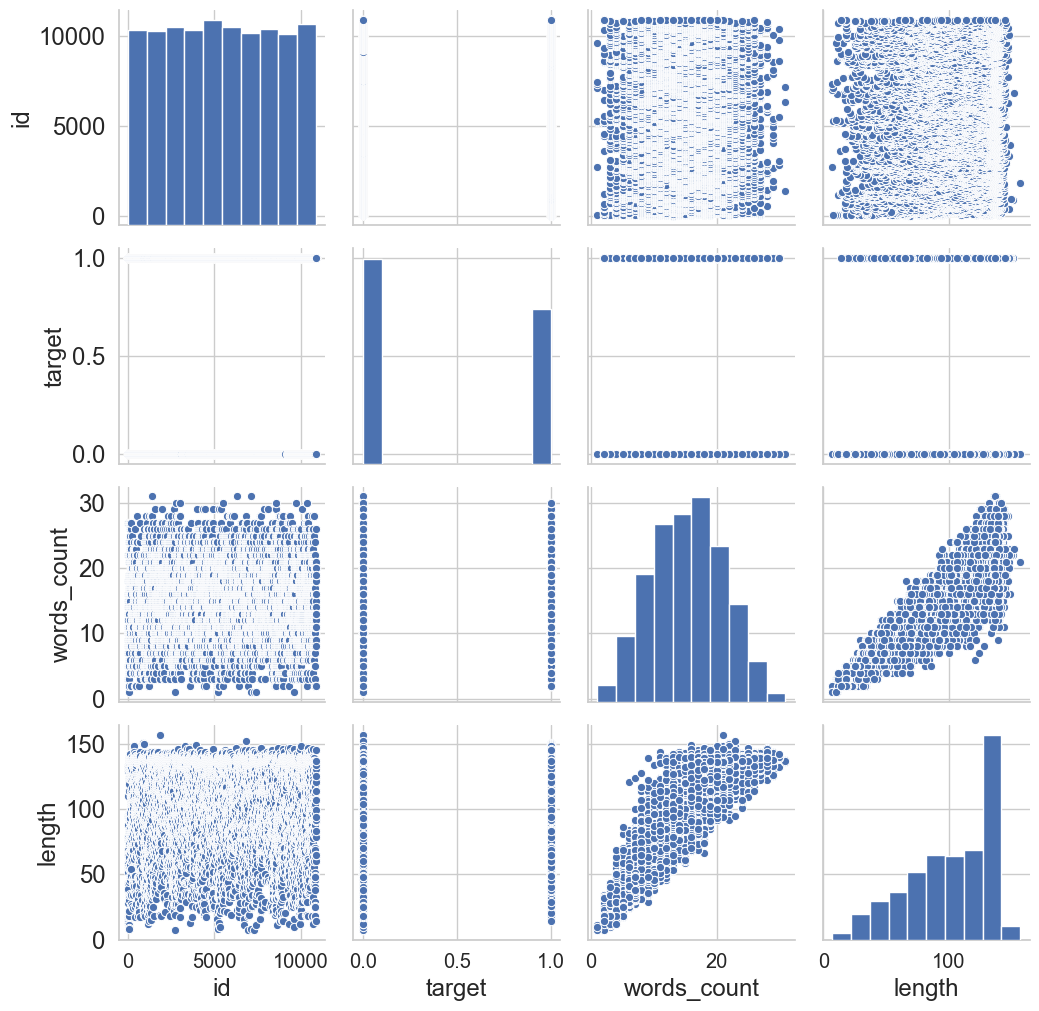

In [12]:
# correlations
plot = sns.pairplot(train_df)
plot.savefig("exports/correlations.png")

**Lets analyze value counts for words count**

In [13]:
train_df['words_count'].value_counts()

11    497
18    494
17    494
16    451
14    450
13    445
15    425
12    415
20    409
19    390
9     363
10    334
21    296
8     293
22    279
7     242
23    220
24    189
6     186
5     159
25    129
4     115
26     98
3      75
27     60
28     41
2      34
29     13
1       8
30      6
31      3
Name: words_count, dtype: int64

In [14]:
train_df["words_count"].describe()

count               7,613.00
mean                   14.90
std                     5.73
min                     1.00
25%                    11.00
50%                    15.00
75%                    19.00
max                    31.00
Name: words_count, dtype: float64

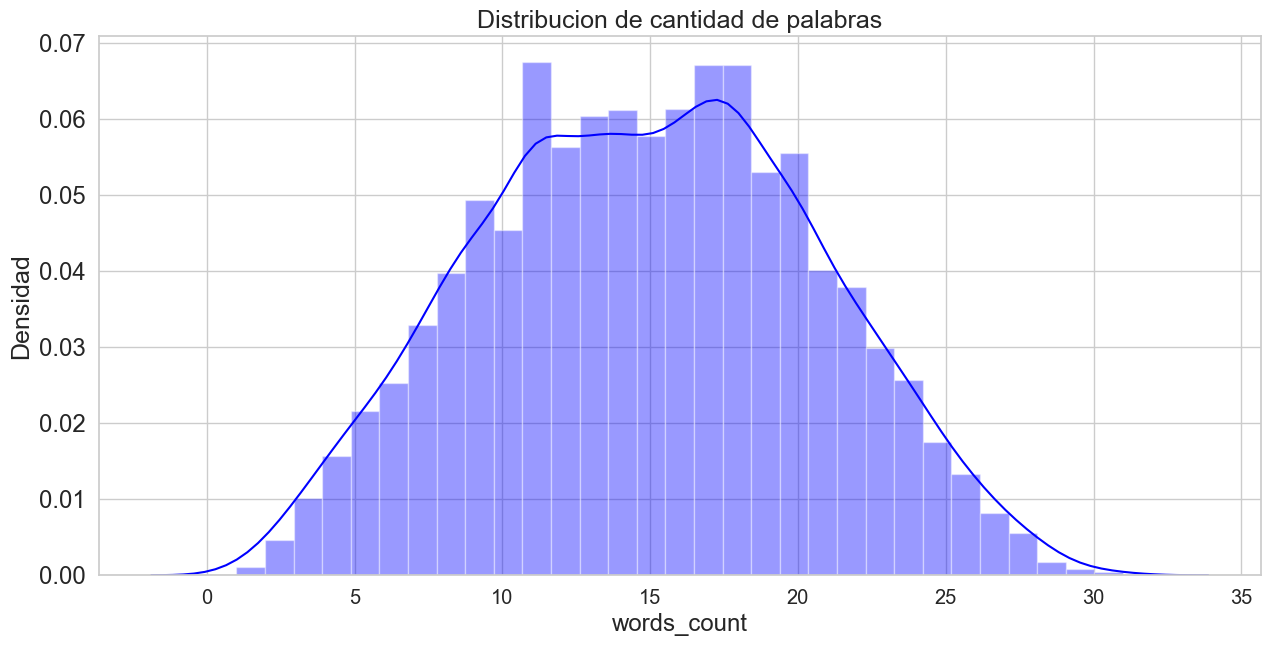

In [15]:
plot = sns.distplot(train_df["words_count"], color="blue", label='Word count for tweets', hist=True, bins=31)
plot.set_title("Distribucion de cantidad de palabras", fontsize=18)
plot.set_ylabel("Densidad", fontsize=18)
plot.figure.savefig('exports/words_distrution.png', dpi=100)

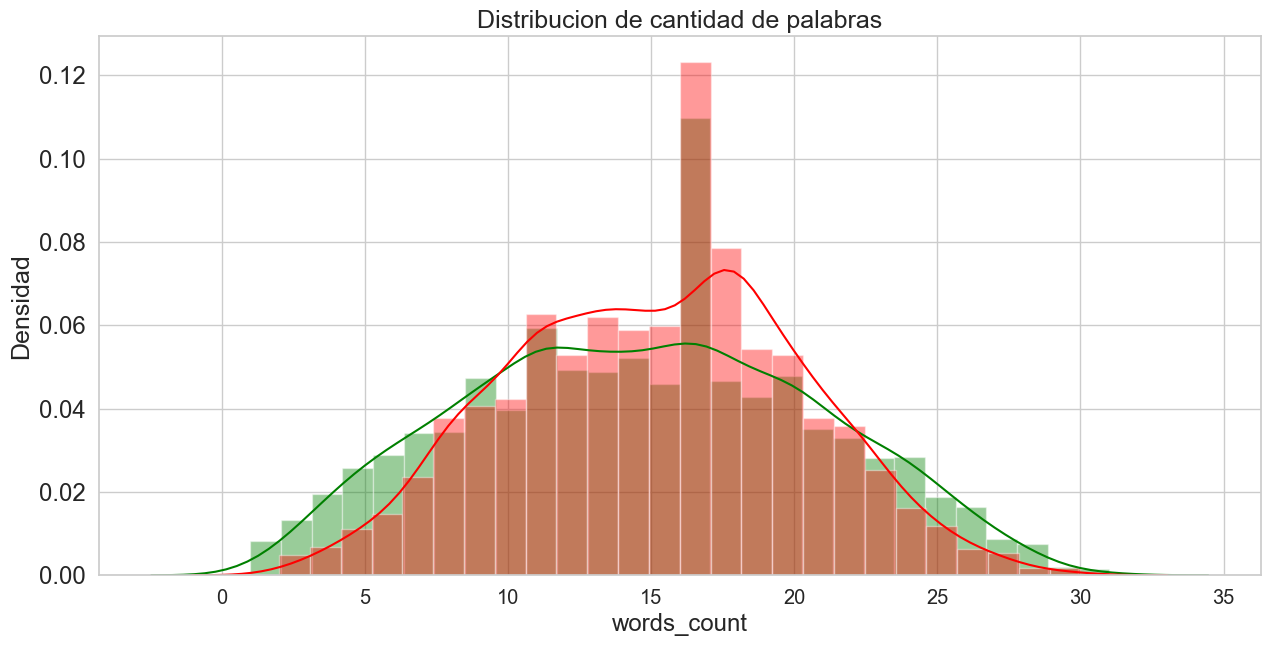

In [16]:
plot = sns.distplot(train_df[train_df["target"] == 0]["words_count"], color="green", label='Word count for fake disasters', hist=True)
plot = sns.distplot(train_df[train_df["target"] == 1]["words_count"], color="red", label='Word count for real disasters', hist=True)
plot.set_title("Distribucion de cantidad de palabras", fontsize=18)
plot.set_ylabel("Densidad", fontsize=18)
plot.figure.savefig('exports/words_distrution_by_classification.png', dpi=100)

### As we can see words count have pretty similar distribution for real and fake disasters

### we can also see this in the correlation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


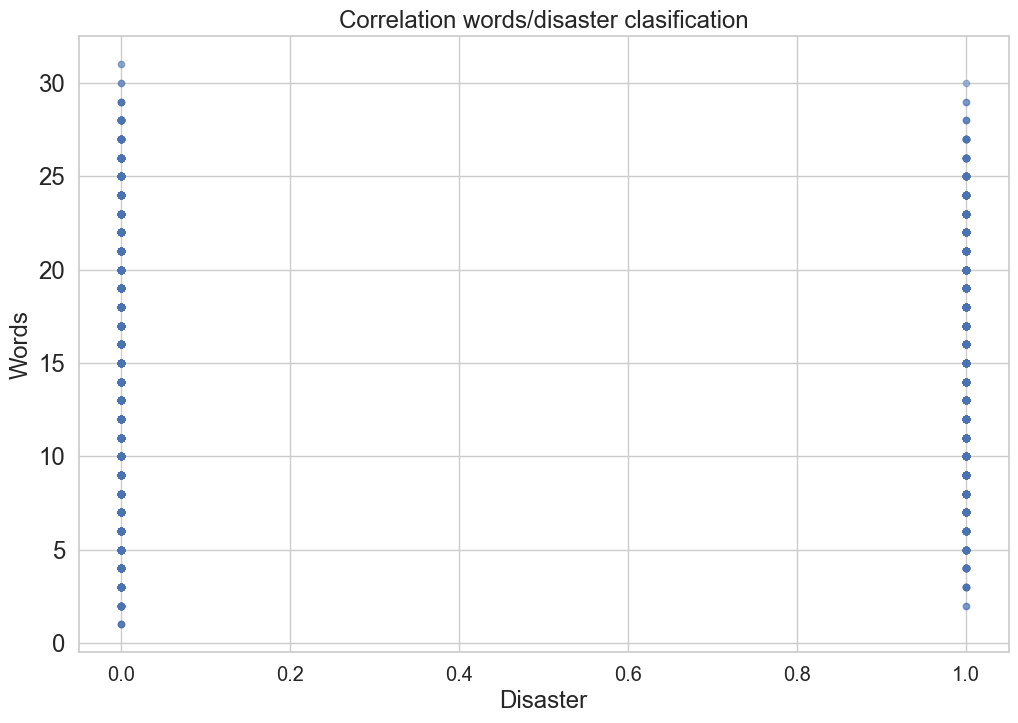

In [17]:
train_df.plot.scatter('target','words_count', title='Correlation words/disaster clasification',alpha=0.25,figsize=(12,8));
ax=plt.gca()
ax.set_ylabel('Words')
ax.set_xlabel('Disaster');
ax.figure.savefig('exports/words_corr.png', dpi=100)

In [18]:
train_df.corr()

,id,target,words_count,length
id,1.00,0.06,0.01,0.02
target,0.06,1.00,0.04,0.18
words_count,0.01,0.04,1.00,0.84
length,0.02,0.18,0.84,1.00


### it doent look like there is a strong correlationship between them, 
### Lets analyze similar analysis for tweet length

In [19]:
train_df['length'].value_counts()

136    401
139    275
138    256
140    218
137    210
      ... 
150      2
151      1
152      1
149      1
157      1
Name: length, Length: 147, dtype: int64

In [20]:
train_df["length"].describe()

count               7,613.00
mean                  101.04
std                    33.78
min                     7.00
25%                    78.00
50%                   107.00
75%                   133.00
max                   157.00
Name: length, dtype: float64

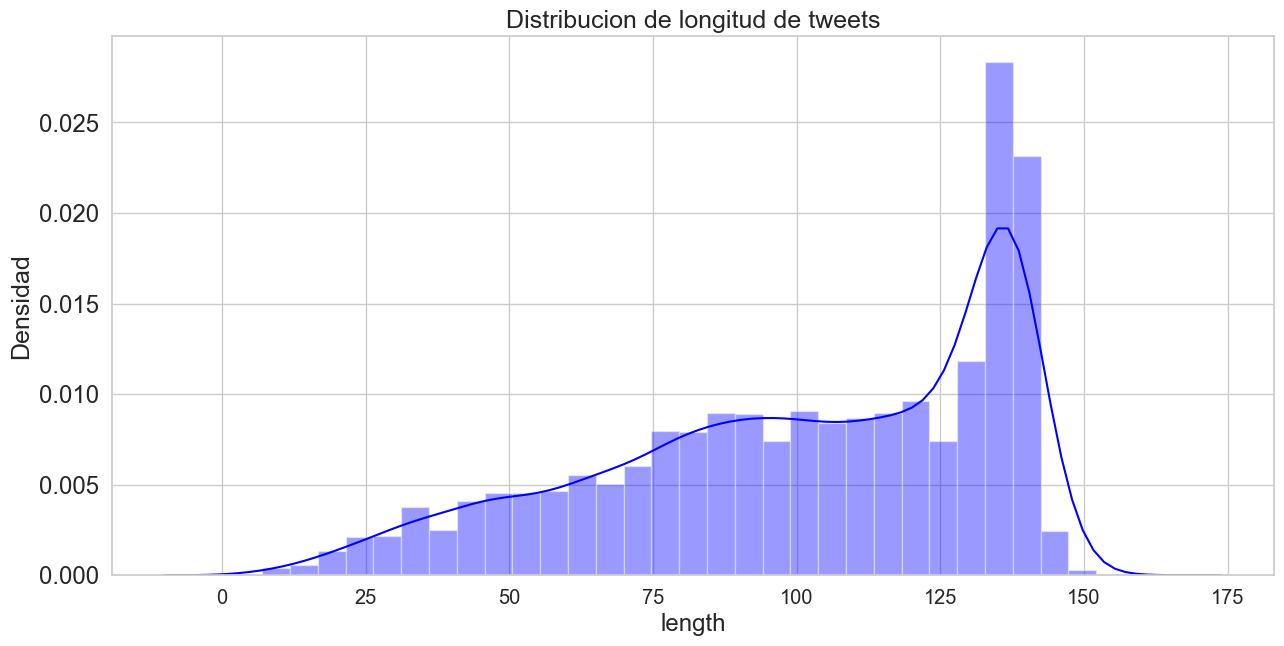

In [21]:
plot = sns.distplot(train_df["length"], color="blue", label='Tweet length', hist=True, bins=31)
plot.set_title("Distribucion de longitud de tweets", fontsize=18)
plot.set_ylabel("Densidad", fontsize=18)
plot.figure.savefig('exports/length_distrution.png', dpi=100)

In [22]:
train_df[train_df["target"] == 0]["length"].describe()

count               4,342.00
mean                   95.71
std                    35.89
min                     7.00
25%                    68.00
50%                   101.00
75%                   130.00
max                   157.00
Name: length, dtype: float64

In [23]:
train_df[train_df["target"] == 1]["length"].describe()

count               3,271.00
mean                  108.11
std                    29.31
min                    14.00
25%                    88.00
50%                   115.00
75%                   136.00
max                   151.00
Name: length, dtype: float64

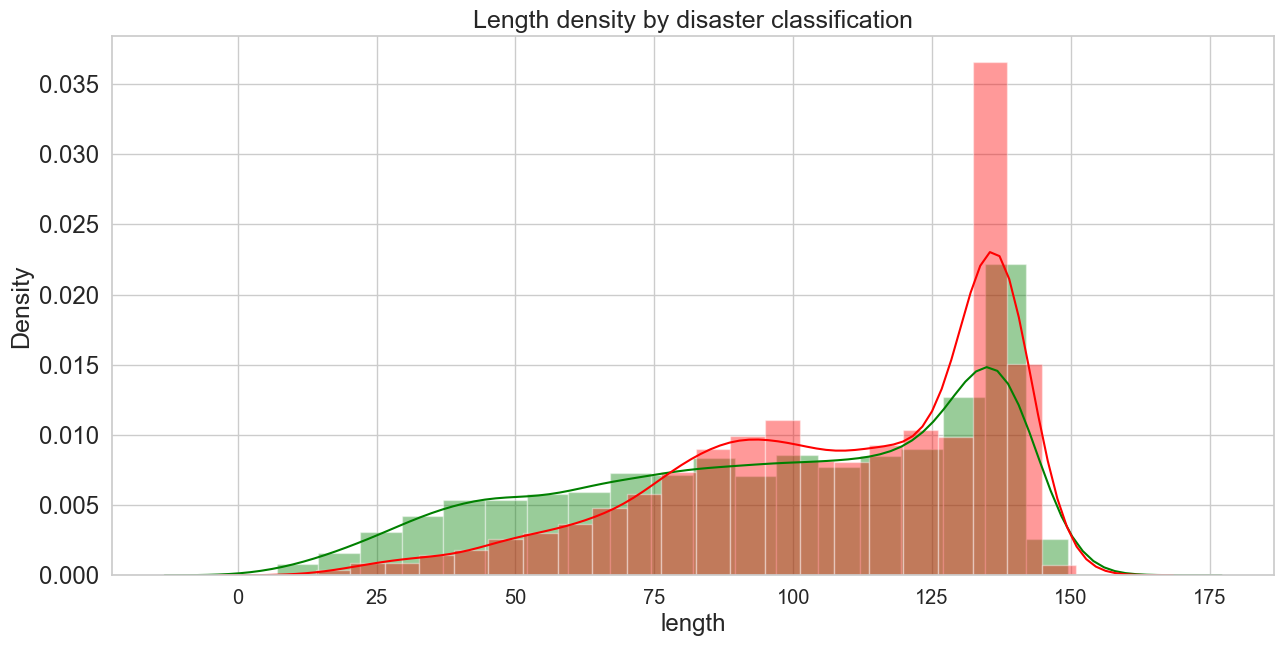

In [24]:
plot = sns.distplot(train_df[train_df["target"] == 0]["length"], color="green", label='Fake disasters', hist=True)
plot = sns.distplot(train_df[train_df["target"] == 1]["length"], color="red", label='Real disasters', hist=True)

plot.set_title("Length density by disaster classification", fontsize=18)
plot.set_ylabel("Density", fontsize=18)
plot.figure.savefig('exports/words_distrution_by_classification.png', dpi=100)

In [25]:
train_df.loc[(train_df["target"] == 0) & (train_df["length"] < 15)].shape[0]/train_df.loc[train_df["length"] < 15].shape[0]

0.9629629629629629

In [26]:
train_df.loc[(train_df["target"] == 0) & (train_df["length"] < 50)].shape[0]/train_df.loc[train_df["length"] < 50].shape[0]

0.807843137254902

In [27]:
train_df.loc[train_df["length"] < 50].shape[0]/train_df.loc[train_df["length"]].shape[0]

0.10048601077104952

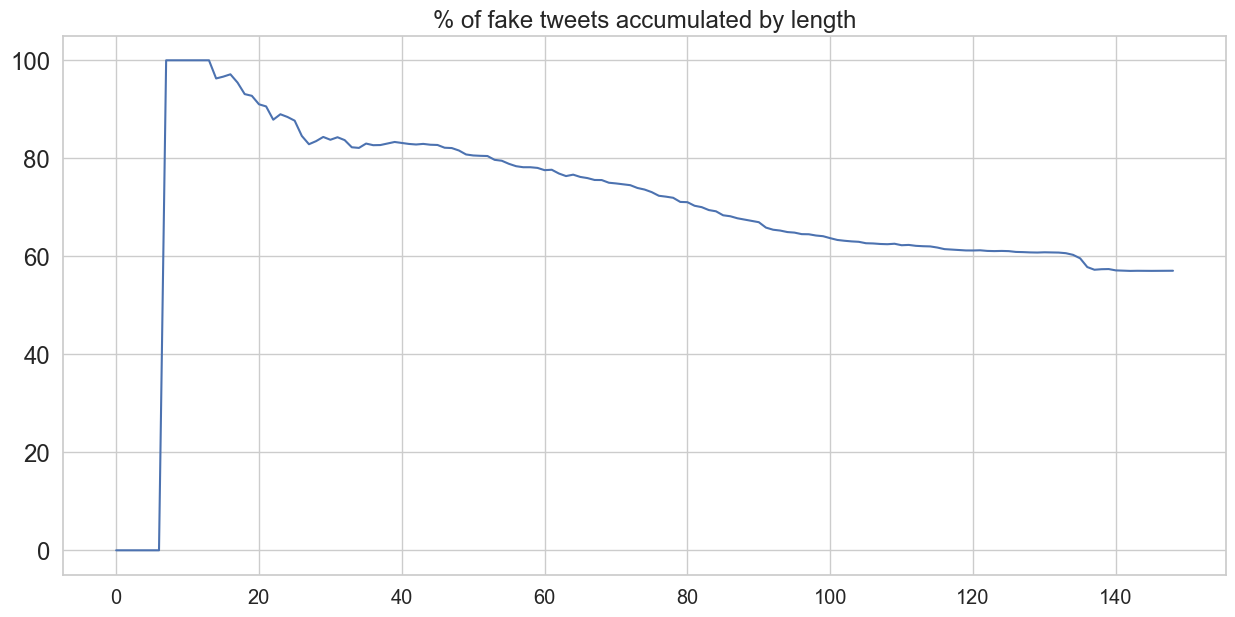

In [28]:
series = [train_df.loc[(train_df["target"] == 0) & (train_df["length"] < x)].shape[0]/train_df.loc[train_df["length"] < x].shape[0] \
               if train_df.loc[train_df["length"] < x].shape[0] > 0 else 0 for x in range(1, 150)]
pd_series = pd.Series(series)
pd_series = pd_series*100
p = pd_series.plot.line(title='% of fake tweets accumulated by length')
p.figure.savefig('exports/acummulated_non_disaster_by_length.png', dpi=100)

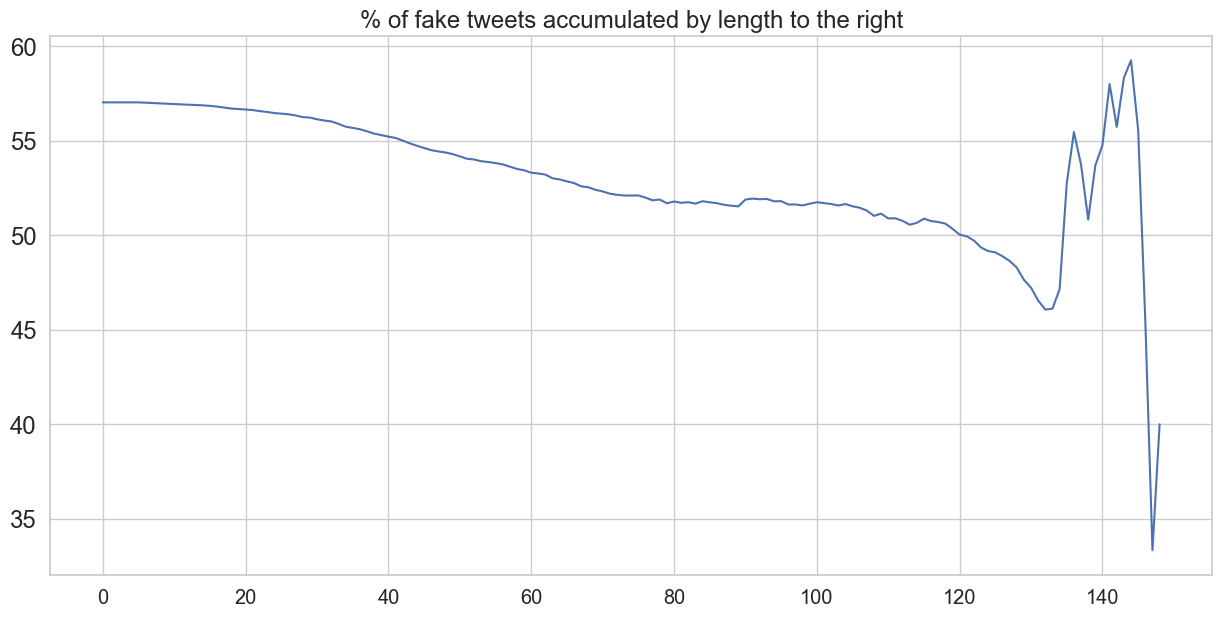

In [29]:
series = [train_df.loc[(train_df["target"] == 0) & (train_df["length"] > x)].shape[0]/train_df.loc[train_df["length"] > x].shape[0] \
               if train_df.loc[train_df["length"] > x].shape[0] > 0 else 0 for x in range(1, 150)]
pd_series = pd.Series(series)
pd_series = pd_series*100
plot = pd_series.plot.line(title='% of fake tweets accumulated by length to the right')
plot.figure.savefig('exports/acummulated_to_right_non_disaster_by_length.png', dpi=100)

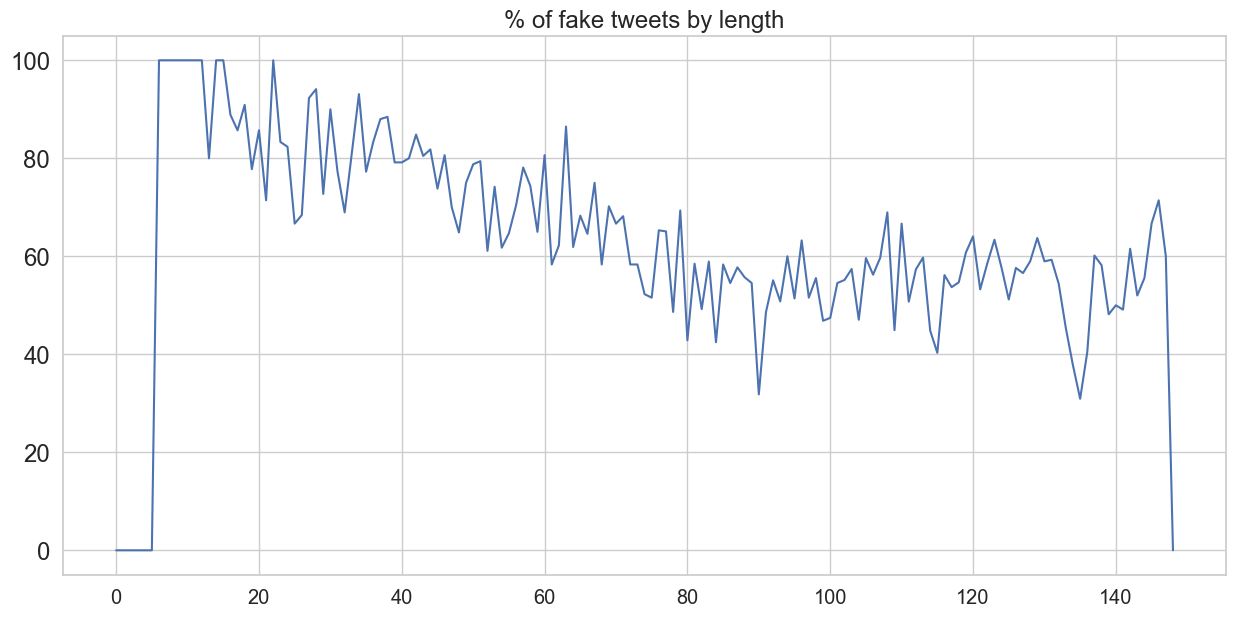

In [30]:
series = [train_df.loc[(train_df["target"] == 0) & (train_df["length"] == x)].shape[0]/train_df.loc[train_df["length"] == x].shape[0] \
               if train_df.loc[train_df["length"] == x].shape[0] > 0 else 0 for x in range(1, 150)]
pd_series = pd.Series(series)
pd_series = pd_series*100
plot = pd_series.plot.line(title='% of fake tweets by length')
plot.figure.savefig('exports/pge_fake_tweets_by_length.png', dpi=100)

As we can see for really short tweets there is hight change of being fake
80% of short tweets (50 chars or less) announce fake disasters
96% of short tweets (15 chars or less) announce fake disasters

### Lets analyze the keywords

In [31]:
# Lets make it lower case
NULL_PLACEHOLDER = 'NULL_PLACEHOLDER_A1234131'.lower()
train_df['keyword'] = train_df['keyword'].fillna(NULL_PLACEHOLDER).apply(lambda x :x.lower()).replace(NULL_PLACEHOLDER,np.nan)
train_df.keyword.describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [32]:
train_df['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
sinking                  41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [33]:
train_df['keyword'].value_counts().describe()

count                 221.00
mean                   34.17
std                     4.79
min                     9.00
25%                    33.00
50%                    35.00
75%                    37.00
max                    45.00
Name: keyword, dtype: float64

In [34]:
train_df[train_df["target"] == 0]["keyword"].value_counts().describe()

count                 218.00
mean                   19.83
std                     9.49
min                     1.00
25%                    12.00
50%                    20.00
75%                    28.00
max                    40.00
Name: keyword, dtype: float64

In [35]:
train_df[train_df["target"] == 1]["keyword"].value_counts().describe()

count                 220.00
mean                   14.68
std                     9.67
min                     1.00
25%                     6.00
50%                    13.00
75%                    22.25
max                    39.00
Name: keyword, dtype: float64

In [36]:
mean = train_df['keyword'].value_counts().mean()
mean

34.171945701357465

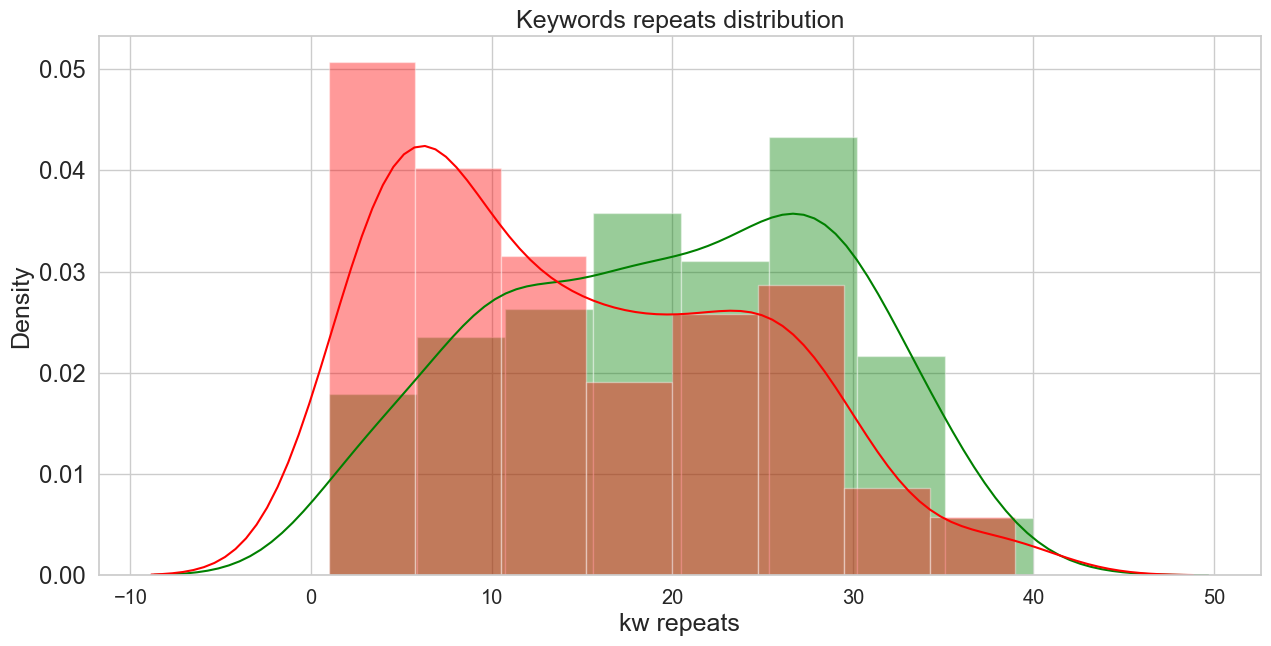

In [37]:
plot = sns.distplot(train_df[train_df["target"] == 0]["keyword"].value_counts(), color="green", label='Non disasters', hist=True)
plot = sns.distplot(train_df[train_df["target"] == 1]["keyword"].value_counts(), color="red", label='Disasters', hist=True)
plot.set_title("Keywords repeats distribution", fontsize=18)
plot.set_ylabel("Density", fontsize=18)
plot.set_xlabel("kw repeats", fontsize=18)
plot.figure.savefig('exports/keyword_dist_by_classification.png', dpi=100)

### Lets take 35 as a high number of keyword apparence

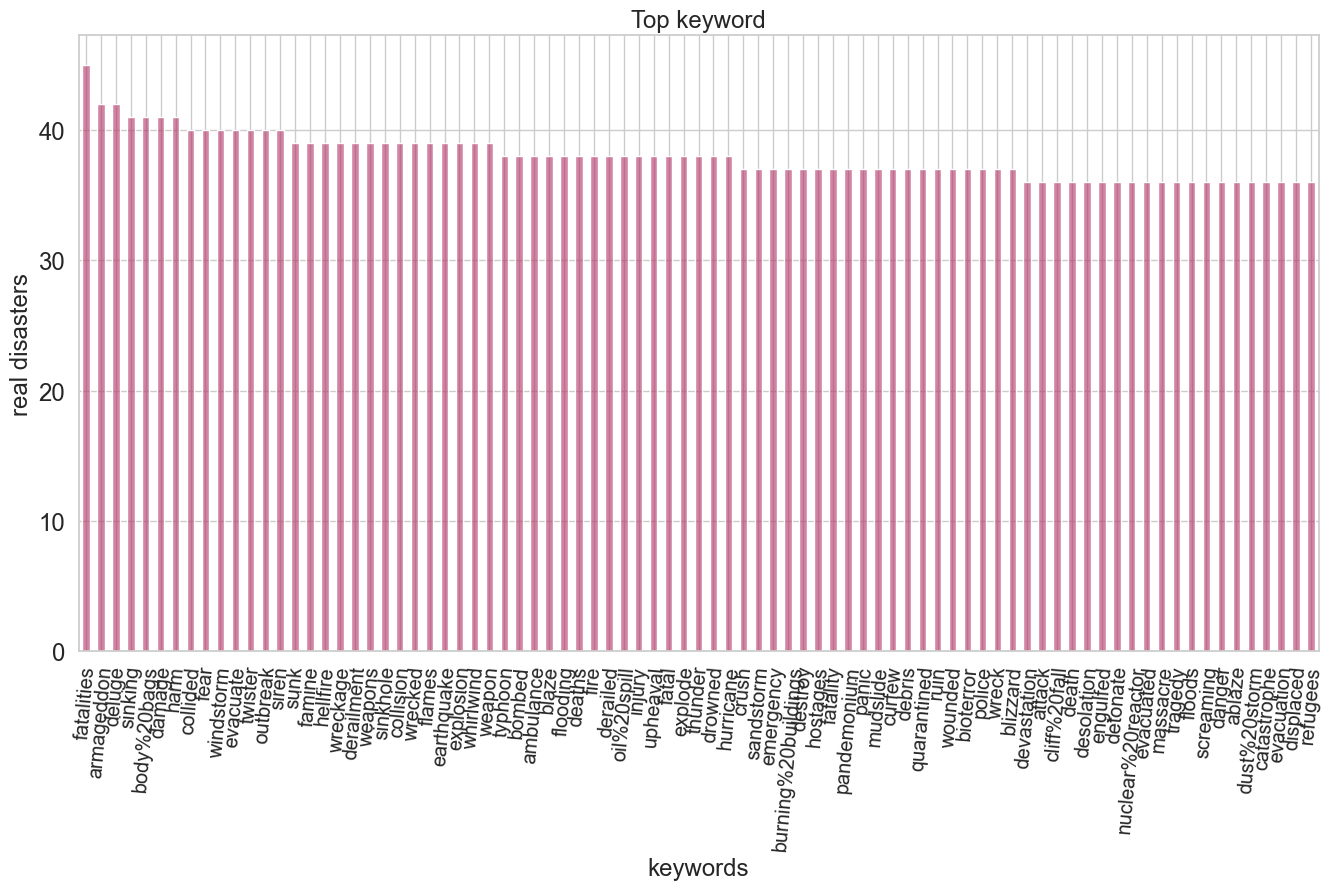

In [38]:
plot = train_df['keyword'].value_counts()[(train_df['keyword'].value_counts() > 35)].plot(kind='bar',figsize=(16,8),rot=85,title='Top keyword',color=(0.7, 0.2, 0.4, 0.6));
plot.set_ylabel('real disasters');
plot.set_xlabel('keywords')
plot.figure.savefig('exports/top_keywords.png', dpi=100)

Lets take analyze keywords over the mean to keep the most representative values only

In [39]:
kw_more_than_mean = train_df.groupby("keyword").filter(lambda x: len(x) > mean)

In [40]:
top_kw = kw_more_than_mean.groupby('keyword').agg({'target': ['sum','count', 'mean', 'std'], 'length': ['mean', 'std']})
level0 = top_kw.columns.get_level_values(0)
level1 = top_kw.columns.get_level_values(1)
top_kw.columns = level0 + '_' + level1
top_kw = top_kw.reset_index()
top_kw['negative_cases'] = top_kw['target_count'] - top_kw['target_sum']
top_kw

,keyword,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
0,ablaze,13,36,0.36,0.49,94.69,32.54,23
1,accident,24,35,0.69,0.47,100.09,34.49,11
2,airplane%20accident,30,35,0.86,0.36,106.40,30.15,5
3,ambulance,20,38,0.53,0.51,98.39,22.90,18
4,armageddon,5,42,0.12,0.33,102.02,33.40,37
...,...,...,...,...,...,...,...,...
109,windstorm,16,40,0.40,0.50,100.38,26.84,24
110,wounded,26,37,0.70,0.46,111.05,29.96,11
111,wreck,7,37,0.19,0.40,88.54,35.93,30
112,wreckage,39,39,1.00,0.00,122.26,24.76,0


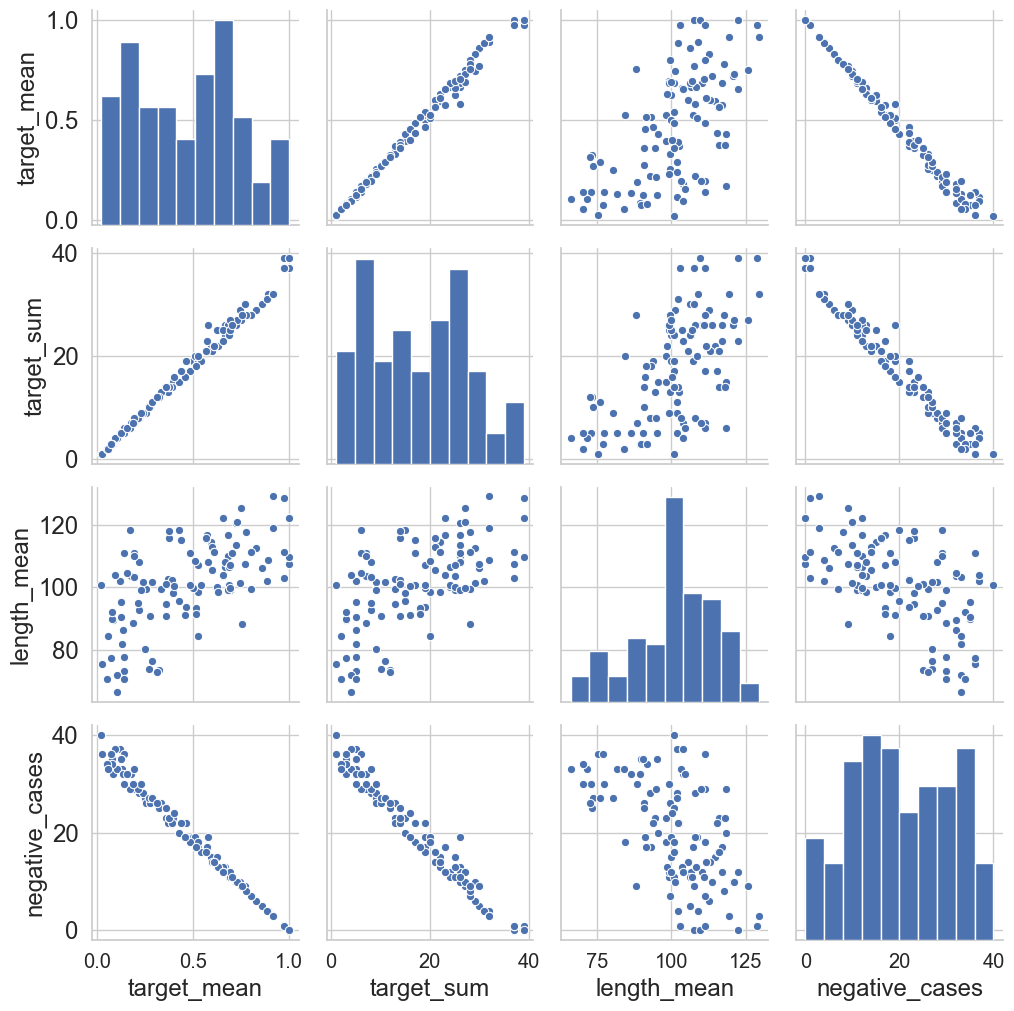

In [41]:
# correlations
corr_df = top_kw[['target_mean', 'target_sum', 'length_mean', 'negative_cases']]
plot = sns.pairplot(corr_df)
plot.savefig('exports/agg_corr.png', dpi=100)

In [42]:
corr_df.corr()

,target_mean,target_sum,length_mean,negative_cases
target_mean,1.00,0.99,0.60,-0.99
target_sum,0.99,1.00,0.60,-0.98
length_mean,0.60,0.60,1.00,-0.58
negative_cases,-0.99,-0.98,-0.58,1.00


In [43]:
top_kw.describe()

,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
count,114.00,114.00,114.00,114.00,114.00,114.00,114.00
mean,17.32,37.15,0.47,0.41,101.07,30.55,19.82
std,10.11,2.01,0.27,0.11,13.85,5.94,10.46
min,1.00,35.00,0.02,0.00,66.27,16.01,0.00
25%,8.00,35.00,0.22,0.36,93.46,26.87,12.00
50%,17.50,37.00,0.49,0.45,101.96,30.76,19.00
75%,25.75,38.00,0.69,0.49,111.14,35.69,29.00
max,39.00,45.00,1.00,0.51,129.34,43.05,40.00


In [44]:
top_kw['target_count'].sum()/train_df.shape[0]

0.5562853014580323

In [45]:
top_kw['target_count'].sum()

4235

### This only represents 56% of the dataset with 4235 samples

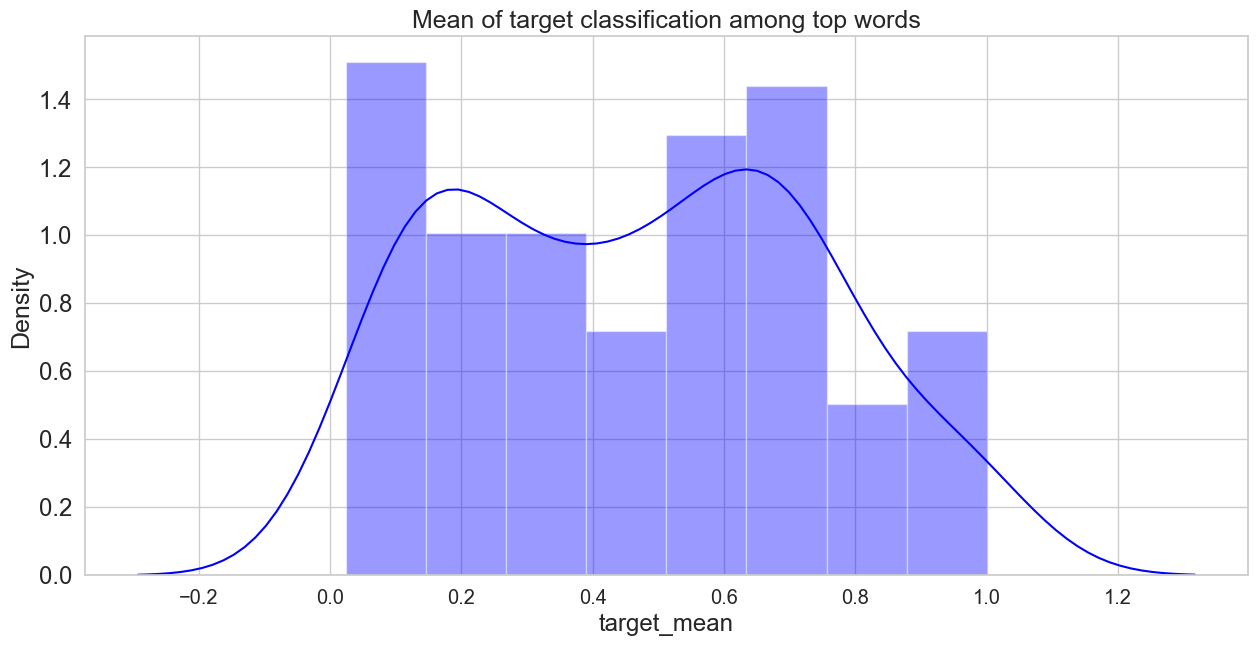

In [46]:
plot = sns.distplot(top_kw["target_mean"], color="blue", label='Classification distribution', hist=True, bins=8)
plot.set_title("Mean of target classification among top words", fontsize=18)
plot.set_ylabel("Density", fontsize=18)
plot.figure.savefig('exports/mean_of_target_classification_among_topwords.png', dpi=100)

## As we can see, there are a lot of top keyword associated with contributing fake cases
this words are (mean <= 0.15):

In [47]:
kw_low_mean = top_kw[top_kw['target_mean'] <= 0.15]
kw_low_mean

,keyword,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
4,armageddon,5,42,0.12,0.33,102.02,33.40,37
8,blaze,5,38,0.13,0.34,81.68,37.69,33
9,bleeding,5,35,0.14,0.36,73.14,28.86,30
10,blizzard,4,37,0.11,0.31,71.89,36.62,33
11,blood,5,35,0.14,0.36,77.51,35.75,30
12,bloody,3,35,0.09,0.28,89.37,37.29,32
13,body%20bags,1,41,0.02,0.16,100.78,37.69,40
24,crush,4,37,0.11,0.31,66.27,25.48,33
25,curfew,5,37,0.14,0.35,86.43,39.33,32
31,deluge,6,42,0.14,0.35,111.17,30.27,36


In [48]:
low_mean_kw_list = list(kw_low_mean['keyword'])
(low_mean_kw_list, len(low_mean_kw_list))

(['armageddon',
  'blaze',
  'bleeding',
  'blizzard',
  'blood',
  'bloody',
  'body%20bags',
  'crush',
  'curfew',
  'deluge',
  'explode',
  'fear',
  'harm',
  'panic',
  'ruin',
  'screaming',
  'screams',
  'siren',
  'traumatised',
  'twister',
  'wrecked'],
 21)

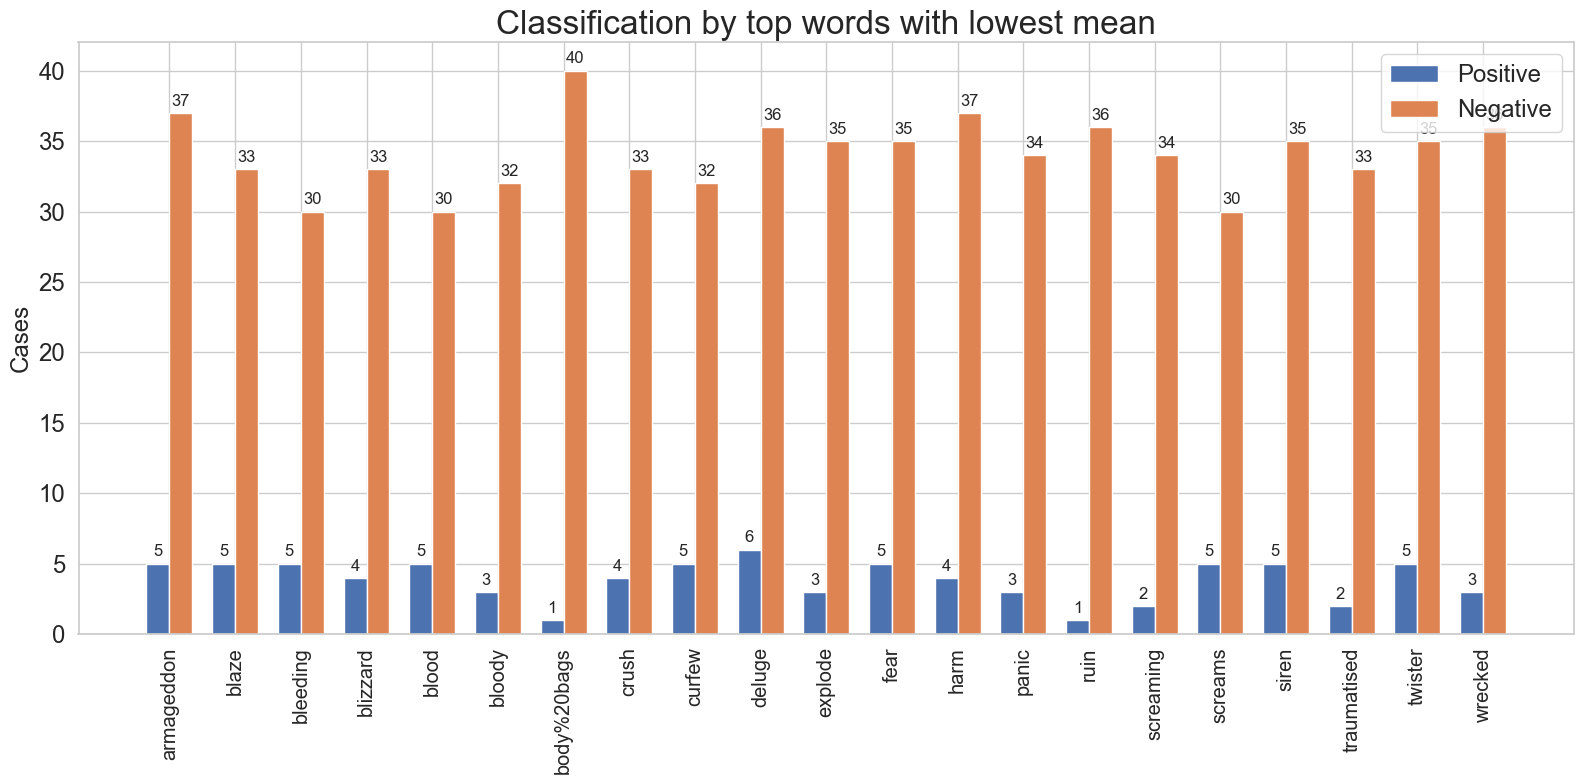

In [49]:
labels = list(kw_low_mean['keyword'])
postive_cases = list(kw_low_mean['target_sum'])
negative_cases = list(kw_low_mean['negative_cases'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, postive_cases, width, label='Positive')
rects2 = ax.bar(x + width/2, negative_cases, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Classification by top words with lowest mean', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('exports/kw_classification_by_lowest_mean.png', dpi=300)
plt.show()

Lets take a look at the ones with high mean (>= 0.85)

In [50]:
kw_high_mean = top_kw[top_kw['target_mean'] > 0.85]
kw_high_mean

,keyword,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
2,airplane%20accident,30,35,0.86,0.36,106.40,30.15,5
30,debris,37,37,1.00,0.00,107.59,25.35,0
35,derailment,39,39,1.00,0.00,109.79,25.09,0
50,evacuated,32,36,0.89,0.32,108.94,28.94,4
77,oil%20spill,37,38,0.97,0.16,102.97,24.46,1
78,outbreak,39,40,0.97,0.16,128.93,16.01,1
83,razed,31,35,0.89,0.32,102.11,16.61,4
86,rescuers,32,35,0.91,0.28,129.34,17.74,3
97,suicide%20bomb,32,35,0.91,0.28,119.29,22.85,3
104,typhoon,37,38,0.97,0.16,111.39,33.36,1


In [51]:
high_mean_kw_list = list(kw_high_mean['keyword'])
(high_mean_kw_list, len(high_mean_kw_list))

(['airplane%20accident',
  'debris',
  'derailment',
  'evacuated',
  'oil%20spill',
  'outbreak',
  'razed',
  'rescuers',
  'suicide%20bomb',
  'typhoon',
  'wreckage'],
 11)

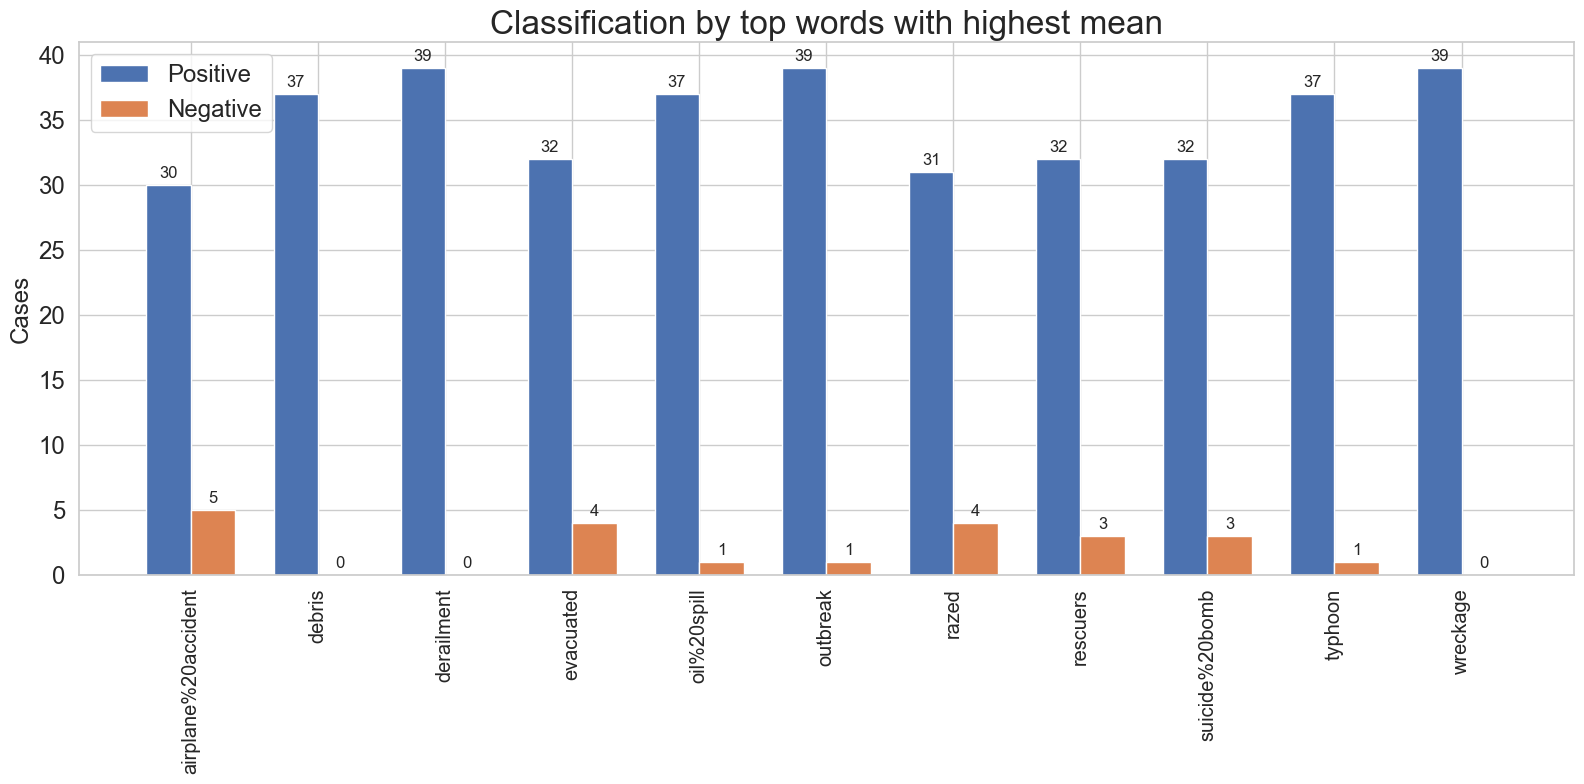

In [52]:
labels = list(kw_high_mean['keyword'])
postive_cases = list(kw_high_mean['target_sum'])
negative_cases = list(kw_high_mean['negative_cases'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, postive_cases, width, label='Positive')
rects2 = ax.bar(x + width/2, negative_cases, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Classification by top words with highest mean', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('exports/kw_classification_by_highest_mean.png', dpi=300)
plt.show()

In [53]:
set(kw_low_mean['keyword']) & set(kw_high_mean['keyword'])

set()

In [54]:
total_edge_keywords = kw_low_mean['target_count'].sum() + kw_high_mean['target_count'].sum()
total_edge_keywords

1204

In [55]:
total_edge_keywords/train_df.shape[0]

0.1581505319847629

### Lets analyze the locations

In [56]:
train_df['location'] = train_df['location'].fillna(NULL_PLACEHOLDER).apply(lambda x :x.lower()).replace(NULL_PLACEHOLDER,np.nan)
train_df['location'].describe()

count     5080
unique    3233
top        usa
freq       104
Name: location, dtype: object

In [57]:
train_df['location'].head(100)

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
              ...         
95               charlotte
96         baton rouge, la
97          hagerstown, md
98    gloucestershire , uk
99                     NaN
Name: location, Length: 100, dtype: object

In [58]:
location_df = train_df.dropna()
loc_counts = location_df['location'].value_counts()
loc_counts.head(60)

usa                  104
new york              75
united states         50
london                49
canada                33
nigeria               31
worldwide             31
uk                    30
los angeles, ca       28
india                 28
mumbai                24
kenya                 21
washington, dc        21
chicago, il           19
everywhere            19
australia             18
california            18
new york, ny          16
california, usa       15
nyc                   15
washington, d.c.      14
united kingdom        14
florida               14
san francisco         14
los angeles           14
chicago               13
indonesia             13
toronto               13
world                 12
ireland               12
earth                 12
texas                 12
seattle               11
san francisco, ca     11
atlanta, ga           11
london, england       10
ss                    10
nashville, tn         10
us                    10
new york city         10


In [59]:
loc_counts.mean()

1.5712960098979276

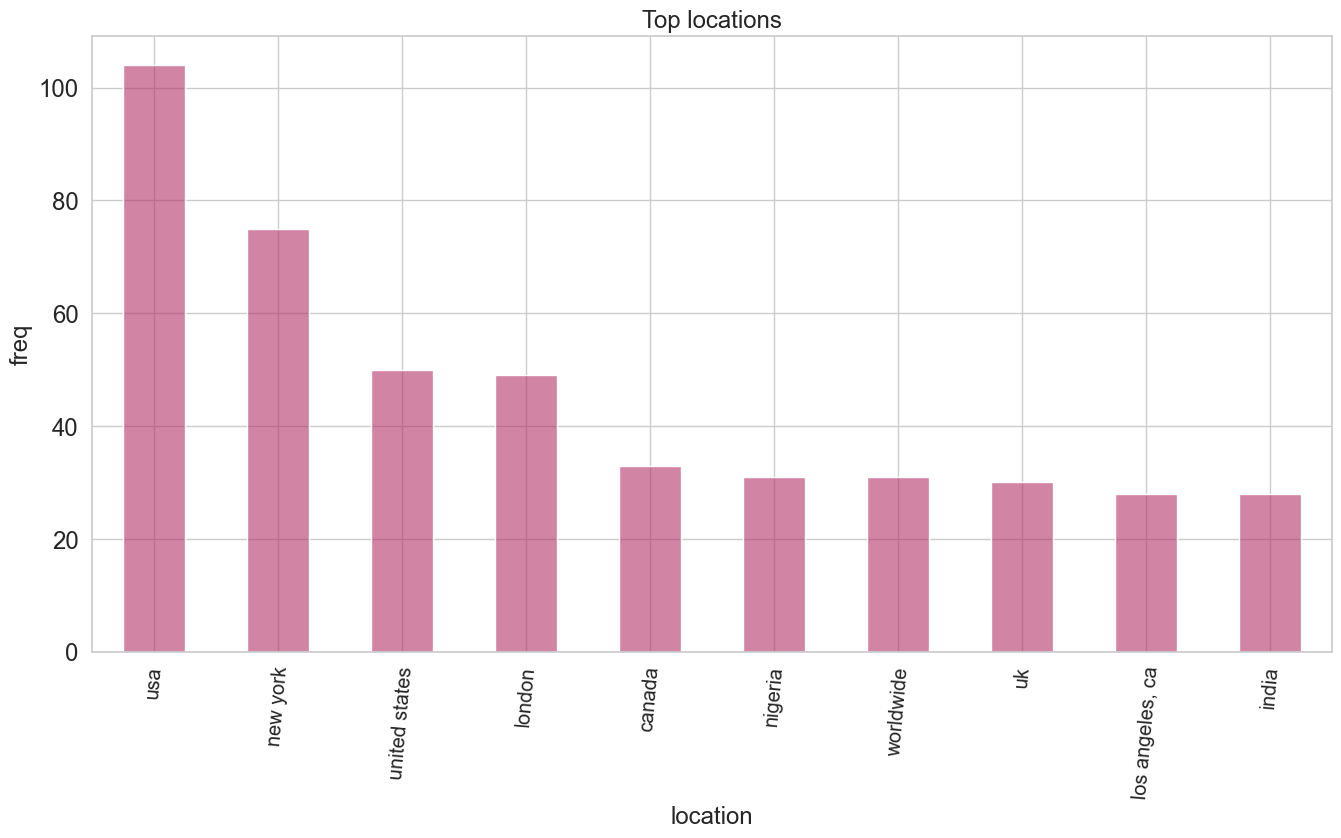

In [60]:
# Top locations for target == 0
plot = loc_counts[:10].plot(kind='bar',figsize=(16,8),rot=85,title='Top locations',color=(0.7, 0.2, 0.4, 0.6));
plot.set_ylabel('freq');
plot.set_xlabel('location')
plot.figure.savefig('exports/top_locations.png', dpi=400)

SystemError: <built-in method write of _io.BufferedWriter object at 0x11be1df68> returned a result with an error set

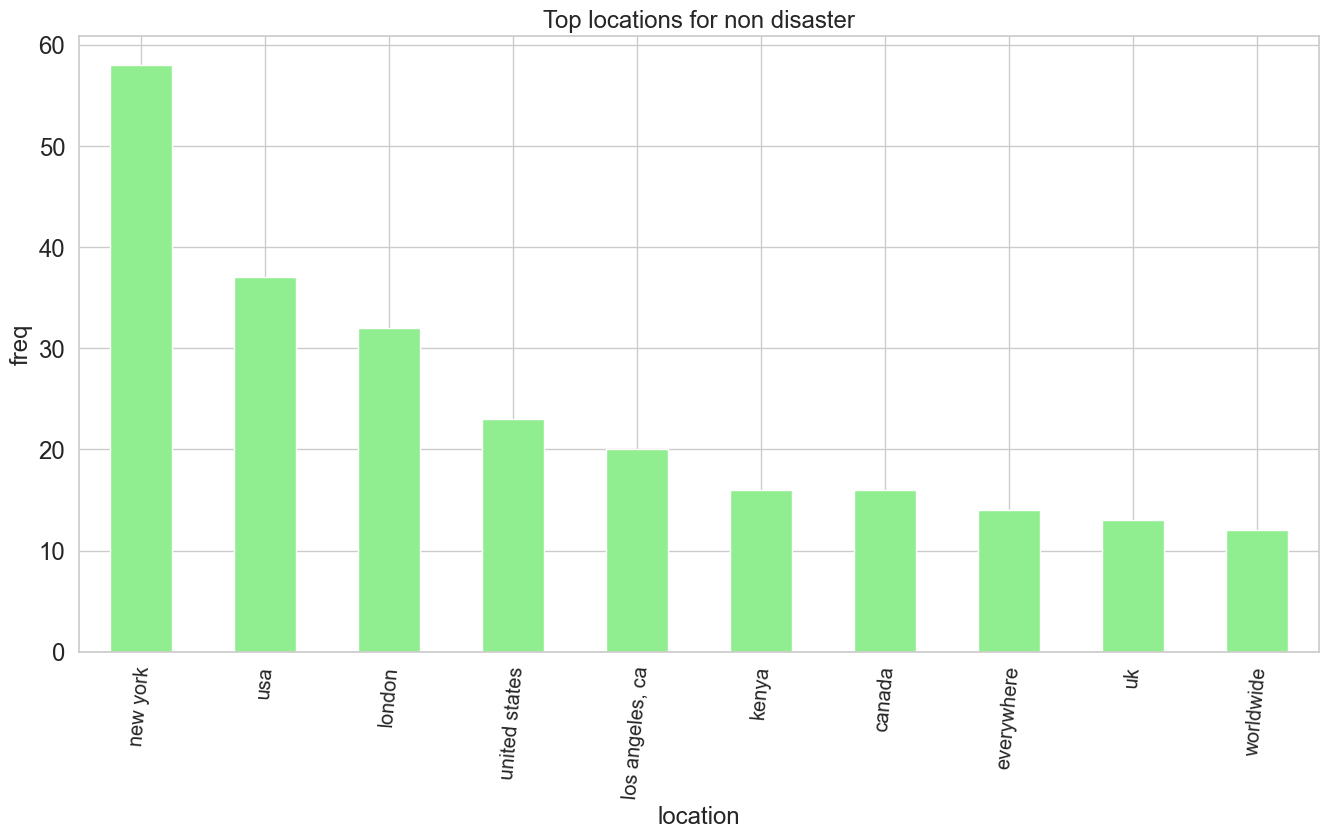

In [61]:
# top location for non disaster
plot = location_df[location_df['target'] == 0]['location'].value_counts()[:10].plot(kind='bar',figsize=(16,8),rot=85,title='Top locations for non disaster',color='lightgreen');
plot.set_ylabel('freq');
plot.set_xlabel('location')
plot.figure.savefig('exports/top_locations_target_0.png', dpi=400)

In [ ]:
# top location for disaster
plot = location_df[location_df['target'] == 1]['location'].value_counts()[:10].plot(kind='bar',figsize=(16,8),rot=85,title='Top locations for disaster',color='red');
plot.set_ylabel('freq');
plot.set_xlabel('location')
plot.figure.savefig('exports/top_locations_target_1.png', dpi=400)

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Non Disaster', 'Disaster'

fig1, ax1 = plt.subplots()
ax1.pie(location_df['target'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=False, startangle=270, colors=['lightgreen','red'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Tweets with location classification')
plt.savefig('exports/location_dataset_classification.png', dpi=100)
plt.show()

In [ ]:
not_nulls = train_df.dropna(subset=['location'])
ny = not_nulls[not_nulls['location'].str.contains("new") | not_nulls['location'].str.contains("ny")]['location'].value_counts()
ny.head(50)

In [ ]:
washington = location_df[location_df['location'].str.contains("washington")]['location'].value_counts()
washington

In [ ]:
hashtags_loc = location_df[location_df['location'].str.contains("#")]['location'].value_counts()
hashtags_loc

In [ ]:
earth_loc = location_df[location_df['location'].str.contains("earth")]['location'].value_counts()
earth_loc

### Words analysis

In [ ]:
train_df['text']

In [ ]:
# based on: https://sigdelta.com/blog/text-analysis-in-pandas/
# https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words)) if len(words) > 0 else 0

from textblob import TextBlob
from nltk.corpus import stopwords
stop = stopwords.words('english')

train_df['links'] = train_df['text'].str.count('http')
train_df['stopwords'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
train_df['hashtags'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train_df['mentions'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train_df['numerics'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train_df['upper'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train_df['avg_word'] = train_df['text'].apply(lambda x: avg_word(x))
train_df.head()

In [ ]:
plot = sns.pairplot(train_df)
plot.savefig("exports/extended_correlations.png")

In [ ]:
train_df.corr()

In [ ]:
# Preprocessing
# removing punctuation
train_df['text'] = train_df['text'].str.replace('[^\w\s]','')
# Lower case
train_df['text'] = train_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# remove stop words
# train_df['text'] = train_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# remove links
train_df['text'] = train_df['text'].str.replace('http\S+|www.\S+', '', case=False)
train_df

In [ ]:
# Lets see most common words
freq = pd.Series(' '.join(train_df['text']).split()).value_counts()[:15]
freq

In [ ]:
plot = train_df["links"].hist(bins=4)
plot.set_title('external links histogram')
plot.set_xlabel('links count')
plot.set_ylabel('freq')
plot.figure.savefig("exports/links.png")

In [ ]:
x = train_df[train_df["target"] == 0]["links"]
y = train_df[train_df["target"] == 1]["links"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('External links count by classification')
plt.xlabel('count')
plt.ylabel('density')
plt.savefig("exports/links_classification.png")
plt.show()

In [ ]:
len(x[x>0])

In [ ]:
len(y[y>0])

In [ ]:
plot = train_df["stopwords"].hist(bins=15)
plot.set_title('Stopwords histogram')
plot.set_xlabel('hashtag count')
plot.set_ylabel('freq')
plot.figure.savefig("exports/stopwords.png")

In [ ]:
x = train_df[train_df["target"] == 0]["stopwords"]
y = train_df[train_df["target"] == 1]["stopwords"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Stopwords count by classification')
plt.xlabel('count')
plt.ylabel('density')
plt.savefig(".png")
plt.show()

In [ ]:
plot = train_df["hashtags"].hist(bins=15)
plot.set_title('Hashtags histogram')
plot.set_ylabel('freq')
plot.set_xlabel('hashtag count')
plot.figure.savefig("exports/hashtags.png")

In [ ]:
x = train_df[train_df["target"] == 0]["hashtags"]
y = train_df[train_df["target"] == 1]["hashtags"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Hashtag count by classification')
plt.xlabel('count')
plt.ylabel('density')

plt.show()

In [ ]:
plot = train_df["mentions"].hist(bins=15)
plot.set_title('Mentions histogram')
plot.set_ylabel('freq')
plot.set_xlabel('mention count')
plot.figure.savefig("exports/mentions.png")

In [ ]:
x = train_df[train_df["target"] == 0]["mentions"]
y = train_df[train_df["target"] == 1]["mentions"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Mentions count by classification')
plt.xlabel('count')
plt.ylabel('density')

plt.show()

### Most of the tweets dont have hashtags or mentions